<img src="https://www.gov.br/cbpf/pt-br/assuntos/noticias/titular-tem-artigo-em-periodico-de-prestigio/cbpf.png"  width="500" />

# Neutron star-Black hole Merger: <font color="#FF7F50">Light Curve </font> using Annand et al 2021 model - Tutorial


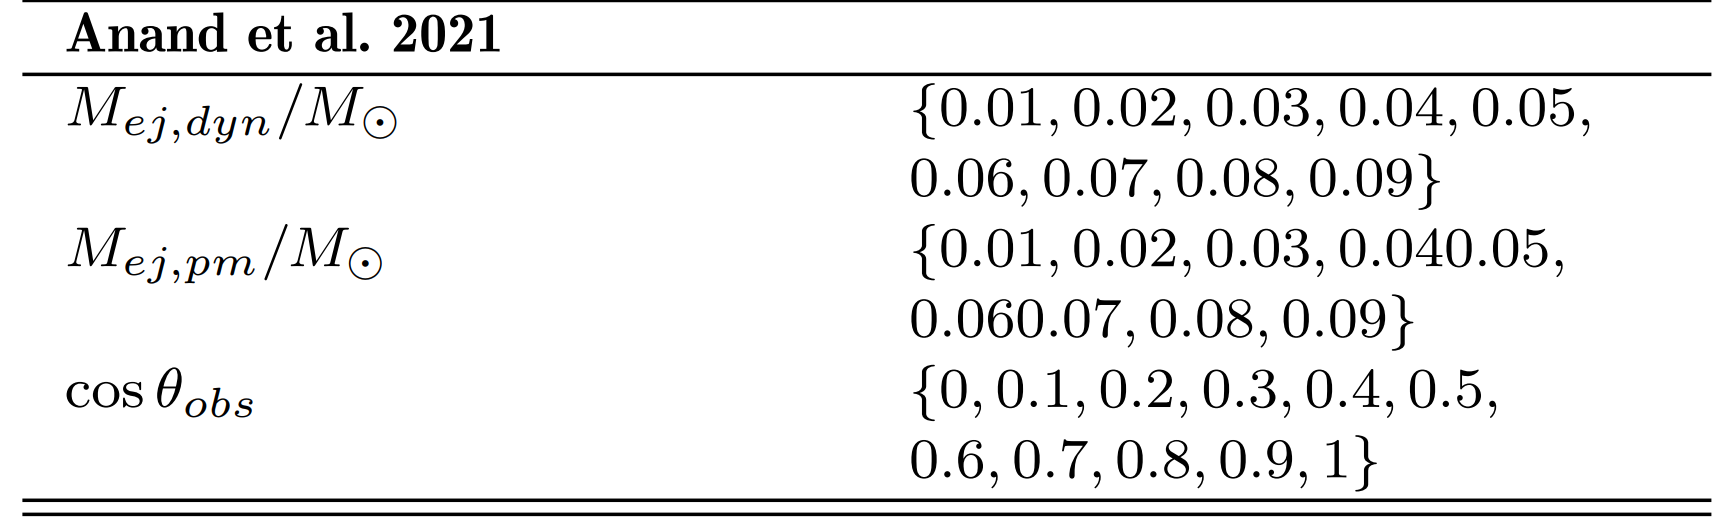

In [2]:
from torch import nn
import kilonovanet
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from tqdm.notebook import tqdm
from scipy import stats as st
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference import prepare_for_sbi, simulate_for_sbi, SNLE, ratio_estimator_based_potential, SNRE_A,SNRE,SNPE
from sbi.inference import likelihood_estimator_based_potential, ImportanceSamplingPosterior, MCMCPosterior
import torch
from scipy.stats import binned_statistic, linregress, gaussian_kde
import pandas as pd
from sbi.utils.get_nn_models import posterior_nn
# Change the Paths to your enviroment 
metadata_file = '/tf/dados10Tdock2/phelipedata/Kilonovas-spec/Pytorch_notebooks/data_kilonovanet/metadata_bulla_bhns.json'
torch_file = '/tf/dados10Tdock2/phelipedata/Kilonovas-spec/Pytorch_notebooks/data_kilonovanet/bulla-bhns-latent-2-hidden-500-CV-4-2021-04-17-epoch-200.pt'
filter_lib = '/tf/dados10Tdock2/phelipedata/Kilonova_Simulation_Based_Inference/Notebooks/KilonovanetGITHUB/Data/filter_data'
model = kilonovanet.Model(metadata_file, torch_file, filter_library_path=filter_lib)

In [34]:
times = np.array(np.linspace(1,50,100))
mej_dyn_mo_range = np.arange(0.01, 0.1, 0.01)
mej_pm_mo_range = np.arange(0.01, 0.1, 0.01)
cos_lobs_range = np.arange(0, 1.1, 0.1)

def light_curve(mej_dyn,mej_pm,cos_obs, distance_MPC):
    parameters  = np.array([mej_dyn,mej_pm,cos_obs])
    distance = distance_MPC * 10 ** 6 * 3.086e18 # 40 Mpc in cm
    filters = ["LSST_u", "LSST_g", "LSST_r", "LSST_i", "LSST_z", "LSST_y", 'CTIO_H','CTIO_J','CTIO_K']
    filter_0 = np.array([filters[1]] * 100)
    filter_1 = np.array([filters[2]] * 100)
    filter_2 = np.array([filters[3]] * 100)
    #return the magnitude for the times difined at "times"
    mag  = model.predict_magnitudes(parameters,times=times, filters=filter_0, distance=distance)
    mag2  = model.predict_magnitudes(parameters,times=times, filters=filter_1, distance=distance)
    mag3  = model.predict_magnitudes(parameters,times=times, filters=filter_2, distance=distance)
    plt.figure(dpi=120)
    plt.plot(times,mag, color='seagreen', lw=3, alpha = 0.9,label=str(filters[1]))
    plt.plot(times,mag2, color='tomato', lw=3, alpha = 0.9,label=str(filters[2]))
    plt.plot(times,mag3, color='darkred', lw=3, alpha = 0.9,label=str(filters[3]))
    parameter_text = f"M_ej_dyn/Msun: {parameters[0]}\nM_ej_pm/Msun: {parameters[1]}\nCos_obs: {parameters[2]}"
    plt.text(0.35, 0.95, parameter_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.gca().invert_yaxis()
    plt.ylabel('AB Magnitude')
    plt.xlabel('Time (Days)')
    plt.hlines(y = 24, xmin = 0, xmax = 50,
       colors = 'black',ls='--', alpha=0.7)
    #plt.ylim(24,16)
    #plt.ylim(12,16)
    #plt.grid()
    plt.xticks(np.arange(0, 51, 5)) 

    plt.legend()
    plt.show()    

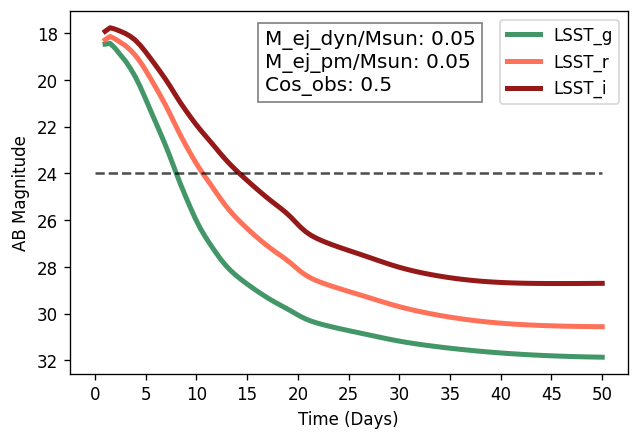

In [39]:
light_curve(mej_dyn=0.05 ,mej_pm=0.05 ,cos_obs= 0.5, distance_MPC= 40)